### Import libraries

In [1]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Import datasets

In [2]:
event = pd.read_json('/home/yves/Desktop/Data_Science/ADM1/adm_hw2/data/events/events_Spain.json')

In [3]:
event.head(3)

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],3542,"[{'y': 61, 'x': 37}, {'y': 50, 'x': 50}]",2565548,Pass,682,1H,2.994582,85,180864419
1,8,Simple pass,[{'id': 1801}],274435,"[{'y': 50, 'x': 50}, {'y': 30, 'x': 45}]",2565548,Pass,682,1H,3.137020,85,180864418
2,8,Simple pass,[{'id': 1801}],364860,"[{'y': 30, 'x': 45}, {'y': 12, 'x': 38}]",2565548,Pass,682,1H,6.709668,85,180864420


In [4]:
players = pd.read_json('/home/yves/Desktop/Data_Science/ADM1/adm_hw2/data/players.json')

In [5]:
match = pd.read_json('/home/yves/Desktop/Data_Science/ADM1/adm_hw2/data/matches/matches_Spain.json')

In [6]:
# match details
event_name = "Barcelona - Real Madrid, 2 - 2" 

### Get the positions

In [7]:
# A function that takes as input the name of a player and the event name
# and returns two lists: x_pos and y_pos. corresponding to the players coordinates during 
# sub_events during the match

def infos(atlet, event_name):
    x_pos = []
    y_pos = []
    id_match = 0
    id_match = match.loc[match['label'] == event_name]['wyId'] # reteive the match Id
    Id=0
    event_name_to_drop = ['Foul','Offside','Others on the ball']# events to delete.We are not interrested in
    
    whole_events = event.loc[event['matchId'] == int(id_match)] # all the events during the match

    Id = players.loc[players['lastName'] == atlet]['wyId']  # player's Id
    
    
    eventt = whole_events.loc[whole_events['playerId'] == int(Id)]  # from the whole events we select only 
                                                                        # those related to our player
    eventt = eventt[~eventt['eventName'].isin(event_name_to_drop)] # delete events we are not interrested in
    
    pos = pd.DataFrame(eventt['positions']) # the column containing all the events we are interrested in
    
    for i in pos['positions']:         # [{'y': 2, 'x':3}, {'y': 20, 'x':3}] 
            x_pos.append(i[0]['x']*1.04)     # I collect the x in the list X_pos and y in the list Y_pos
            #x_pos.append(i[1]['x'])
            y_pos.append(i[0]['y']*0.68)
            #y_pos.append(i[1]['y'])
            
    return(x_pos, y_pos)

    # "Messi Cuccittini"
    # "Cristiano Ronaldo"


In [8]:
# Messi's coordinates
messi_pos = infos("Messi Cuccittini", event_name)
len(messi_pos[0]) # To see the number of events Messi partecipated in

92

In [9]:
# Ronaldo's coordinates
ronaldo_pos = infos("dos Santos Aveiro", event_name) # cristino ronaldo's real name
len(ronaldo_pos[0]) # To see the number of events Ronaldo partecipated in

37

### Draw the pitch

This script I found it online and I modified it. here is the website where I found the script
http://petermckeever.com/2019/01/plotting-xy-football-data-in-python/  </br>


#####   zorder explaination  (usefull to understand the script)


The default drawing order for axes is patches, lines, text.  This
order is determined by the zorder attribute.  The following defaults
are set </br>

| Artist                  | Z-order |
|-------------------------|---------|
| Patch / PatchCollection | 1       |
| Line2D / LineCollection | 2       |
| Text                    | 3       |

You can change the order for individual artists by setting the zorder.  Any
individual plot() call can set a value for the zorder of that particular item.</br>

In the fist subplot below, the lines are drawn above the patch
collection from the scatter, which is the default.</br>

In the subplot below, the order is reversed. </br>

The second figure shows how to control the zorder of individual lines.</br>



In [15]:
from matplotlib.patches import Arc  
def draw_pitch(pitch, line):
    
 
    line = line # color of the lines
    pitch = pitch # color of the pitch
    
    # setting the plot size and correct orientation

    fig,ax = plt.subplots(figsize=(20,15))
    plt.xlim(-1,105)
    plt.ylim(-1,69)
    ax.axis('off') # this hides the x and y ticks

    # side and goal lines #
    ly1 = [0,0,68,68,0]
    lx1 = [0,104,104,0,0]

    plt.plot(lx1,ly1,color=line,zorder=5)


    # boxes, 6 yard box and goals

        #outer boxes#
    ly2 = [13.84,13.84,54.16,54.16] 
    lx2 = [104,87.5,87.5,104]
    plt.plot(lx2,ly2,color=line,zorder=5)

    ly3 = [13.84,13.84,54.16,54.16] 
    lx3 = [0,16.5,16.5,0]
    plt.plot(lx3,ly3,color=line,zorder=5)

        #goals#
    ly4 = [30.34,30.34,37.66,37.66]
    lx4 = [104,104.2,104.2,104]
    plt.plot(lx4,ly4,color=line,zorder=5)

    ly5 = [30.34,30.34,37.66,37.66]
    lx5 = [0,-0.2,-0.2,0]
    plt.plot(lx5,ly5,color=line,zorder=5)


       #6 yard boxes#
    ly6 = [24.84,24.84,43.16,43.16]
    lx6 = [104,99.5,99.5,104]
    plt.plot(lx6,ly6,color=line,zorder=5)

    ly7 = [24.84,24.84,43.16,43.16]
    lx7 = [0,4.5,4.5,0]
    plt.plot(lx7,ly7,color=line,zorder=5)

    #Halfway line, penalty spots, and kickoff spot
    ly8 = [0,68] 
    lx8 = [52,52]
    plt.plot(lx8,ly8,color=line,zorder=5)


    plt.scatter(93,34,color=line,zorder=5)
    plt.scatter(11,34,color=line,zorder=5)
    plt.scatter(52,34,color=line,zorder=5)

    # circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
    # circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
    circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)

    #Prepare Arcs
    leftArc = Arc((93.9,34),height=18.30,ls='solid',width=25.3,color=line, fill=False, 
                   zorder=2,alpha=1,angle=0,theta1=130,theta2=230)
    rightArc = Arc((10.1,34),height=18.30,ls='solid',width=25.3,color=line, fill=False, 
                   zorder=2,alpha=1,angle=180,theta1=130,theta2=230)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)

    ## Rectangles in boxes
    rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
    rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)

    ## Pitch rectangle
    rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)

    ax.add_artist(rec3)
    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)
    # plt.gca().invert_yaxis() #############

        
# draw_pitch("#195905","#faf0e6","h","full")

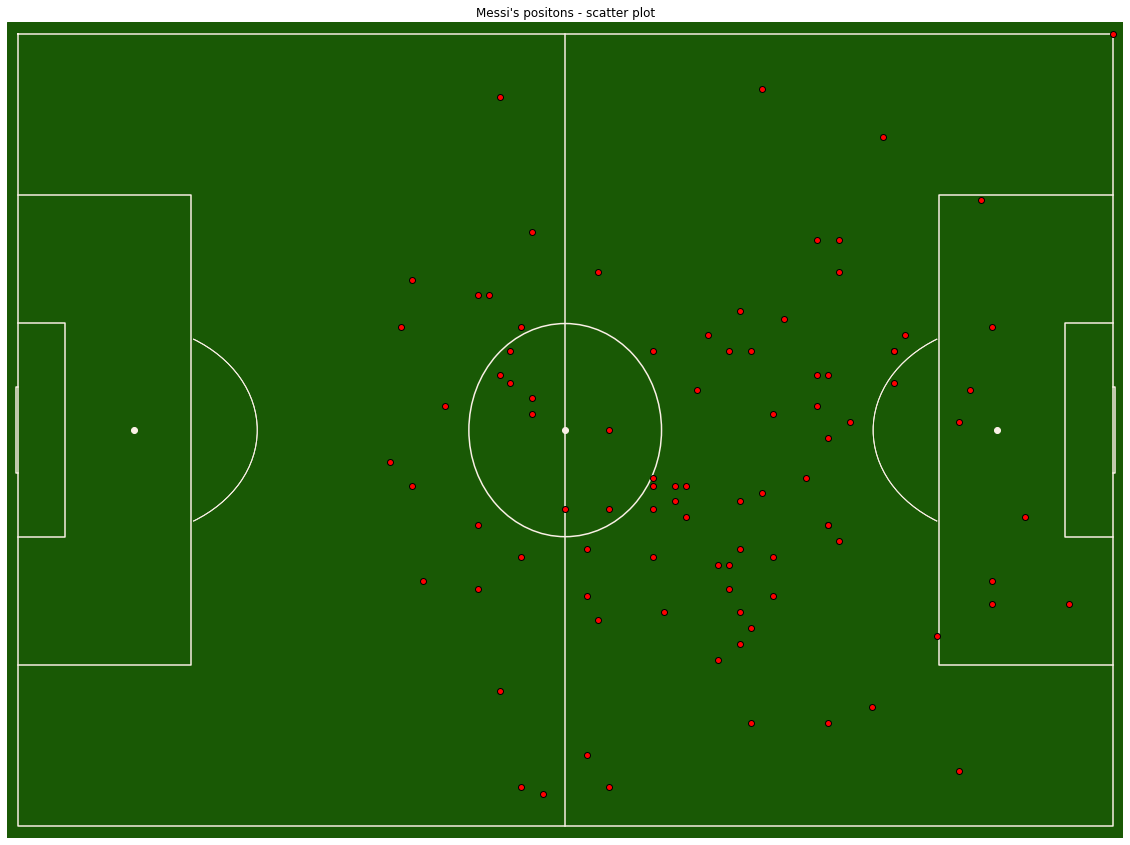

In [16]:
draw_pitch("#195905","#faf0e6")
plt.scatter(messi_pos[0],messi_pos[1],marker='o',color='red',edgecolors="black", zorder=30)
plt.title("Messi's positons - scatter plot")
plt.show()

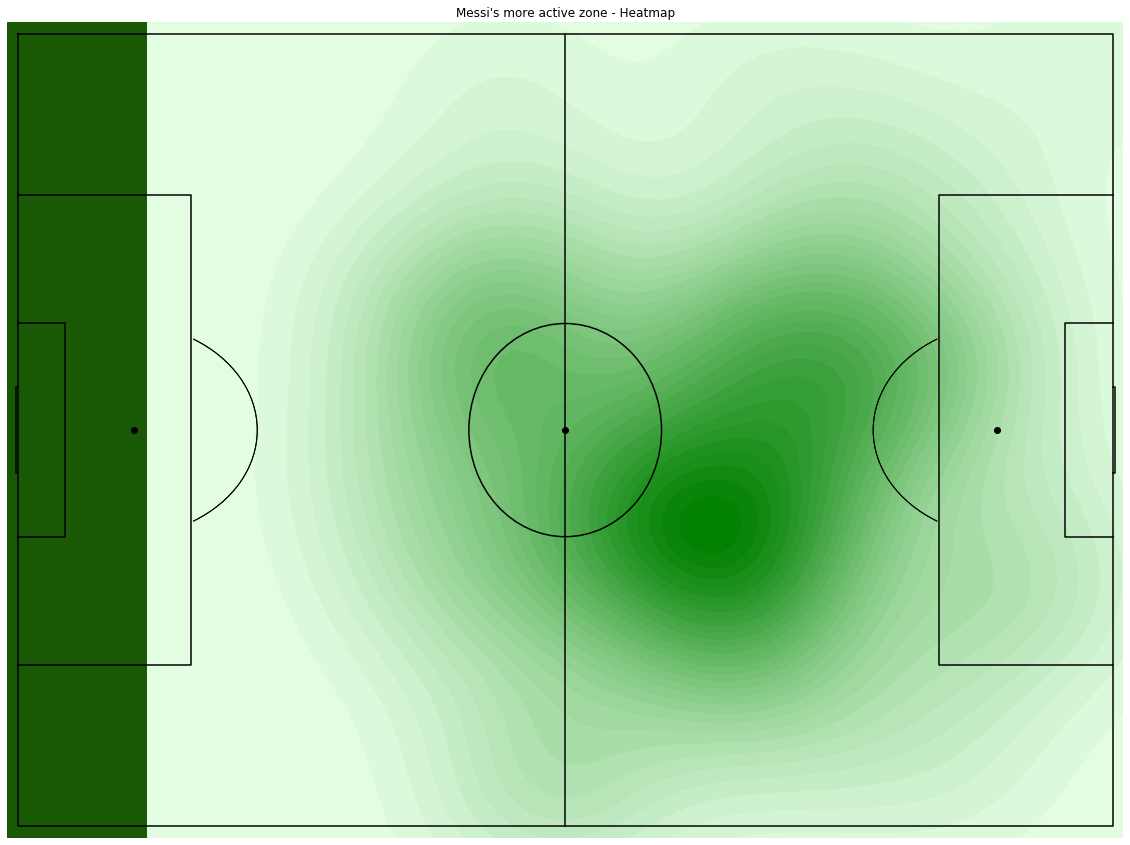

In [17]:
draw_pitch("#195905","black")
sns.kdeplot(messi_pos[0],messi_pos[1], shade = "True", color = "green", n_levels = 40,zorder=2)
plt.title("Messi's more active zone - Heatmap")
plt.show()

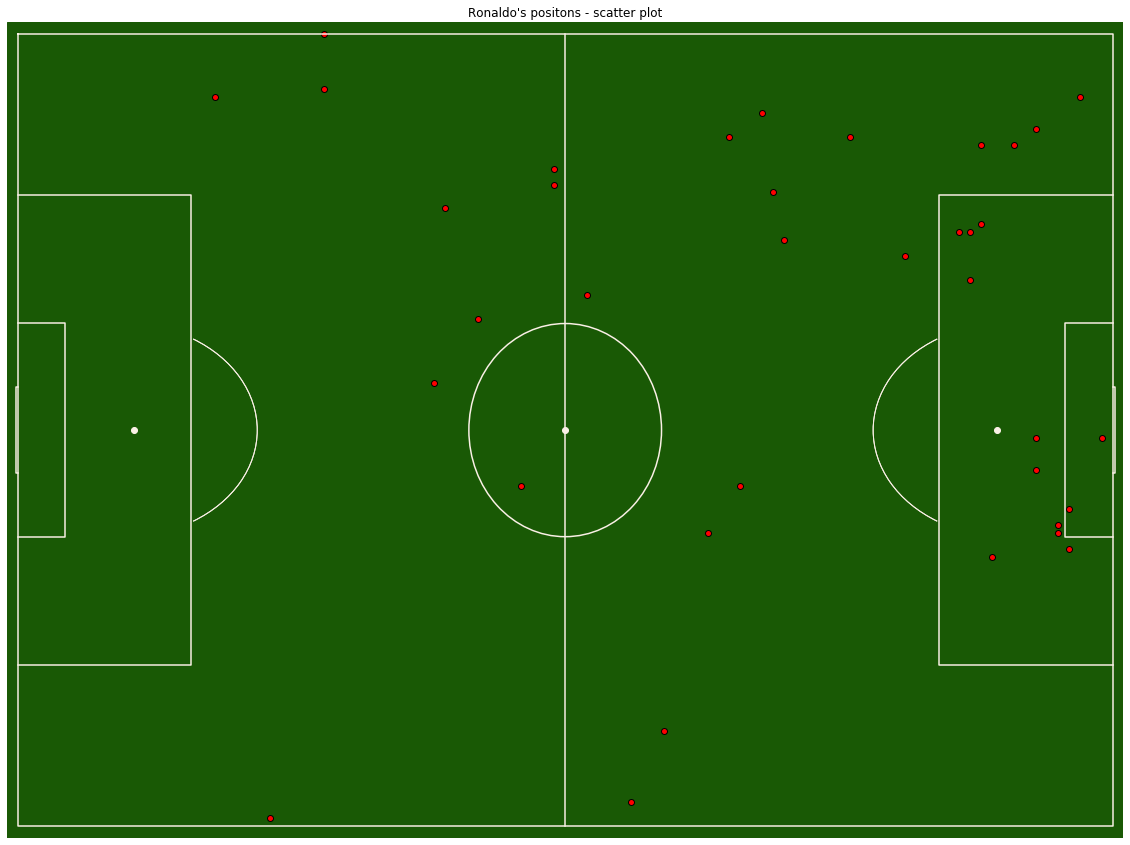

In [18]:
draw_pitch("#195905","#faf0e6")
plt.scatter(ronaldo_pos[0],ronaldo_pos[1],marker='o',color='red',edgecolors="black", zorder=2)
plt.title("Ronaldo's positons - scatter plot")
plt.show()

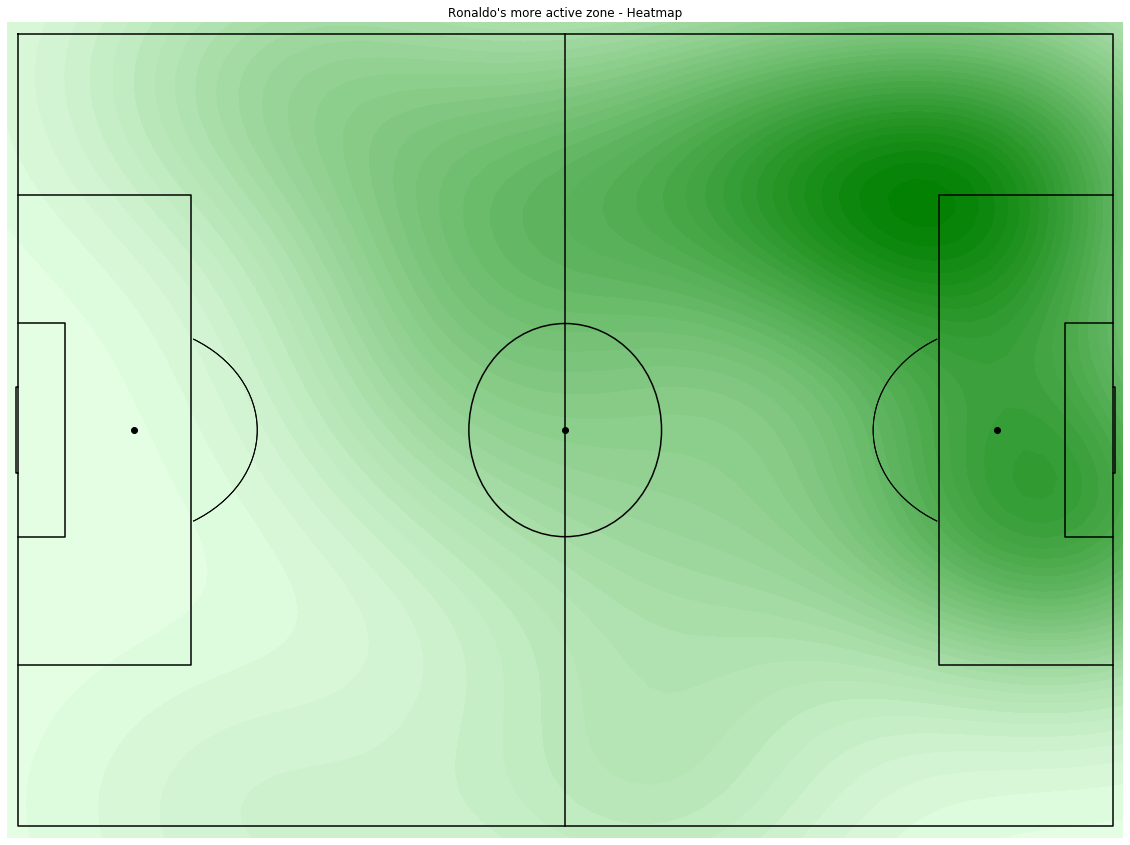

In [19]:
draw_pitch("#195905","black")
sns.kdeplot(ronaldo_pos[0],ronaldo_pos[1], shade = "True", color = "green", n_levels = 40,zorder=2)
plt.title("Ronaldo's more active zone - Heatmap")
plt.show()

### Conclusion

Here are some few consideration about the positions of Cristiano Ronaldo and Lionel Messi during the match
Barcelona - Real Madrid played on the 6 May 2018.</br>

The first thing to notice is the difference in the number of events (passes, shoots, duels and free kicks).
Messi had participated in 92 events while Ronaldo had particpated only in 37 events. </br>

Moreover, twe found a huge difference in the positions and areas covered by this two players during this match.
Messi move around the right half of the pitch close to the center. From the heatmap it's evident he did'nt covered all the area covered by Ronaldo. Ronaldo Move not only arround the center but also near the penalty 
and goal area fo the right half of the pitch. </br>

The differences in the number of events and the difference in the area covered, suggest that Ronaldo, althought he participated in lest event, covered more space so he move a lot rispect to Messi that covered
less space but partecipated in more events. 
